# Figure 1


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

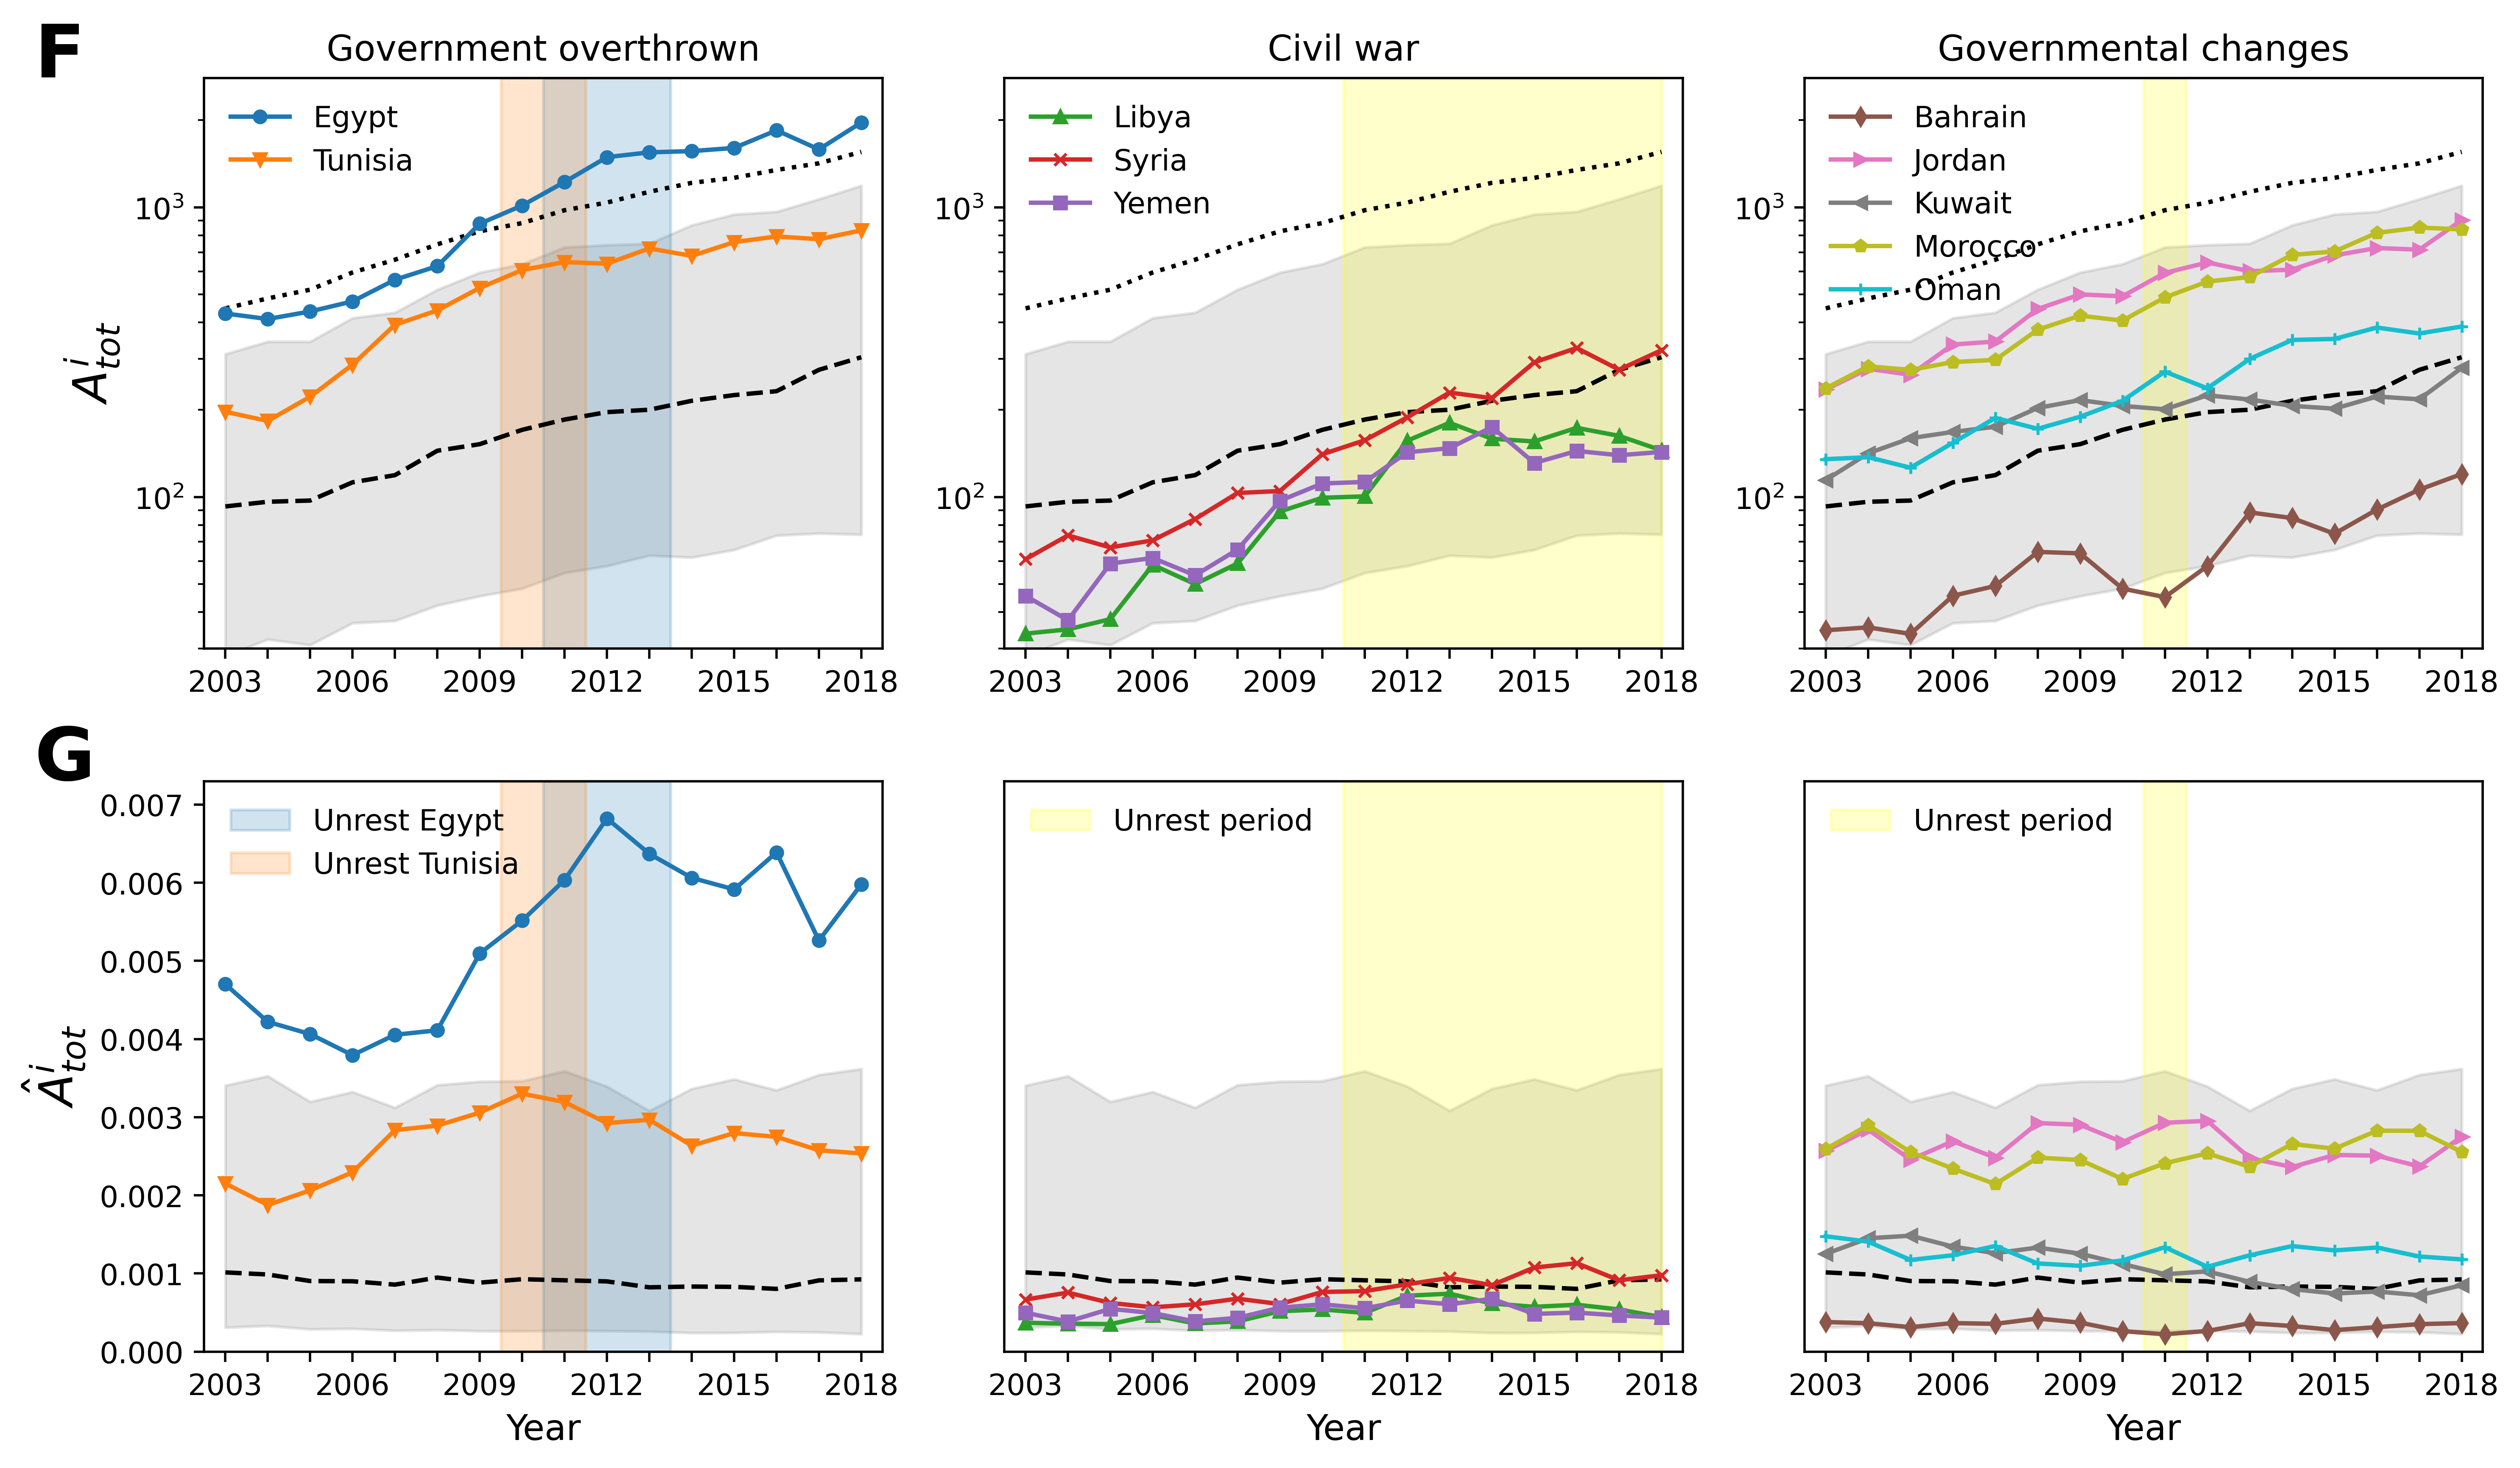

In [35]:
# Create a new figure with custom subplot layout
fig, ax=plt.subplots(nrows=2, ncols=3, figsize=(12, 7), dpi=500)
ax=ax.flat
ax[0].text(-0.25, 1.1, 'F', transform=ax[0].transAxes, verticalalignment='top', fontsize=25,fontweight='bold')
ax[0].set_ylabel('$A_{tot}^i$', fontsize=16)
ax[0].set_title('Government overthrown', fontsize=12)


ax[1].set_title('Civil war', fontsize=12)
ax[1].set_yticks([])



ax[2].set_title('Governmental changes', fontsize=12)
ax[2].set_yticks([])




ax[3].text(-0.25, 1.1, 'G', transform=ax[3].transAxes, verticalalignment='top', fontsize=25,fontweight='bold')
ax[3].set_ylabel('$\hat{A}_{tot}^i$', fontsize=16)
ax[3].set_ylim(0, 0.0073)

ax[4].set_yticks([])
ax[4].set_ylim(0, 0.0073)


ax[5].set_yticks([])
ax[5].set_ylim(0, 0.0073)

plotFG(ax)

for axis in ax[:3]:
    axis.set_xlabel('')
    axis.set_yscale('log')
    axis.set_ylim(30, 2800)


fig.tight_layout()
#fig.savefig('Final_figure1_ver16.pdf')
plt.show()

C:\Users\Yasaman\AppData\Local\Temp\ipykernel_24764\3458525925.py:34: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
c:\Users\Yasaman\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Tunisia
Jordan
Kuwait
Oman
Syria
Yemen
Morocco
Egypt
Libya


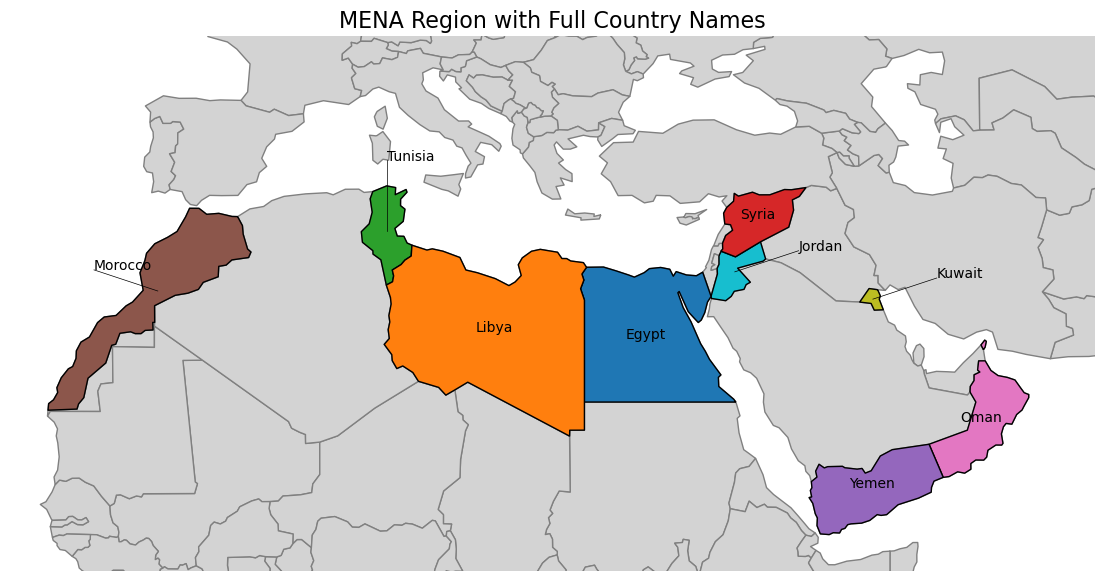

In [95]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Define the observed colors for MENA countries from the uploaded map
country_colors_manual = {
    'EGY': 'C0',  # Egypt
    'LBY': 'C1',  # Libya
    'TUN': 'C2',  # Tunisia
    'SYR': 'C3',  # Syria
    'YEM': 'C4',  # Yemen
    'MAR': 'C5',  # Morocco
    'OMN': 'C6',  # Oman
    'BHR': 'C7',  # Bahrain
    'KWT': 'C8',  # Kuwait
    'JOR': 'C9',  # Jordan
}

# Define full country names
country_full_names = {
    'EGY': 'Egypt',
    'LBY': 'Libya',
    'TUN': 'Tunisia',
    'SYR': 'Syria',
    'YEM': 'Yemen',
    'MAR': 'Morocco',
    'OMN': 'Oman',
    'BHR': 'Bahrain',
    'KWT': 'Kuwait',
    'JOR': 'Jordan',
}

# Load the world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter MENA countries
mena = world[world['iso_a3'].isin(country_colors_manual.keys())]

# Assign colors to each country based on the manual mapping
mena['color'] = mena['iso_a3'].map(country_colors_manual)

# Define the bounding box for the MENA region and its neighbors
lat_min, lat_max = 10, 48
lon_min, lon_max = -20, 65

# Plot the map
fig, ax = plt.subplots(figsize=(14, 10))

# Plot countries
world.cx[lon_min:lon_max, lat_min:lat_max].plot(ax=ax, color="lightgrey", edgecolor="gray")  # Rest of the countries in white
mena.plot(ax=ax, color=mena['color'], edgecolor="black")  # MENA countries with custom colors

# Add country names
for idx, row in mena.iterrows():
    print(row['name'])
    # Get the centroid of each country
    centroid = row['geometry'].centroid
    full_name = country_full_names[row['iso_a3']]
    
    # Check if there is enough space for the name within the country
   
    if row['name'] in ['Morocco', 'Jordan', 'Kuwait', 'Tunisia'] :
        
        # Small country: Place the label outside with a 
        if row['name']=='Morocco':
            label_point = Point(centroid.x - 5, centroid.y+1.5)  # Offset label for clarity
        elif row['name']=='Tunisia':
            label_point = Point(centroid.x, centroid.y+5)  # Offset label for clarity
        else: 
            label_point = Point(centroid.x + 5, centroid.y+1.5)
        ax.plot([centroid.x, label_point.x], [centroid.y, label_point.y], color="black", lw=0.5)  # Line connecting the country and label
        ax.text(label_point.x, label_point.y, full_name, fontsize=10, ha='left', color='black')
    else:
        # Large enough country: Place the label at the centroid
        ax.text(centroid.x, centroid.y, full_name, fontsize=10, ha='center', color='black')

# Highlight the bounding box
ax.set_xlim(lon_min, lon_max)
ax.set_ylim(lat_min, lat_max)

# Add title and remove axes
ax.set_title("MENA Region with Full Country Names", fontsize=16)
ax.axis("off")

plt.show()


In [34]:
def plotFG(axis):
    df_all=pd.read_csv(r"C:\Users\Yasaman\Downloads\Attention-fractional counting.csv")
    df_all=df_all.rename(columns={'aggregated_value':'count', 'country':'Mention_country', 'affiliation_country':'Aff_country'})
    
    df_all=df_all[df_all['year'].isin(np.arange(2003, 2019, 1))]
    Country_list={'Egypt':'EGY', 'Tunisia':'TUN','Libya':'LBY','Syria':'SYR','Yemen':'YEM','Bahrain':'BHR','Jordan':'JOR','Kuwait':'KWT','Morocco':'MAR','Oman':'OMN'}
    rev_Country_list={Country_list[key]: key for key in Country_list}
    Unrest_times={'Egypt':[(2011, 2013)], 'Tunisia':[(2010, 2011)], 'Yemen':[(2011, 2017.5)], 'Syria':[(2011, 2017.5)], 'Libya':[(2011,2017.5)], 'Bahrain':[(2011,2011)], 'Kuwait':[(2011,2011)], 'Morocco':[(2011,2011)], 'Oman':[(2011,2011)], 'Jordan':[(2011, 2011)]}
    
    def  find_information(df,ax):
        
        df=df.merge(df.groupby(['year', 'Mention_country'])['count'].sum().reset_index().rename(columns={'count':'count_mention_country'}), on=['year', 'Mention_country'])
        df=df.merge(df.groupby('year')['count'].sum().reset_index().rename(columns={'count':'total_count'}),on='year')
        df['attention_share_mention_country']=df['count_mention_country']/df['total_count']

        df=df.merge(df[df['Aff_country']==df['Mention_country']].groupby(['year', 'Mention_country'])['count'].sum().reset_index().rename(columns={'count':'count_internal_mention'}), on=['year', 'Mention_country'])
        df=df.merge(df[df['Aff_country']!=df['Mention_country']].groupby(['year', 'Mention_country'])['count'].sum().reset_index().rename(columns={'count':'count_external_mention'}), on=['year', 'Mention_country'])
        df['external_attention_ratio']=df['count_external_mention']/df['count_mention_country']
        df['internal_attention_ratio']=df['count_internal_mention']/df['count_mention_country']
        new_df=df.drop_duplicates(['year', 'Mention_country'])[['year', 'Mention_country', 'attention_share_mention_country','count_mention_country','external_attention_ratio','internal_attention_ratio','count_internal_mention','total_count']].sort_values(by=['year'])
        new_df=new_df.rename(columns={'Mention_country':'countrycode'})
        new_df['percentile_rank_count'] = new_df.groupby('year')['count_mention_country'].rank(pct=True)
        new_df['percentile_rank_EAR'] = new_df.groupby('year')['external_attention_ratio'].rank(pct=True)
        new_df['percentile_rank_share'] =new_df.groupby('year')['attention_share_mention_country'].rank(pct=True)
        plot_time(new_df, 'count_mention_country', r'$TA_i^t$', log=False, ax=ax[:3], show_dates=True)
        plot_time(new_df, 'attention_share_mention_country', r'$\frac{TA_i^t}{\sum_i TA_i^t}$', log=False, show_mean=False, ax=ax[3:],legend_to_show=False)
  

    def plot_time(df, column, column_name,ax, log=True, show_mean=True, y_to_show=None, legend_to_show=True,show_dates=True):
      List=[['egy','tun'], ['lby', 'syr', 'yem'],  [ 'bhr', 'jor', 'kwt', 'mar', 'omn']]
      mean_df=df.groupby('year')[column].mean().reset_index()
      median_df=df.groupby('year')[column].median().reset_index()
      Q25_df=df.groupby('year')[column].quantile(.25).reset_index()
      Q75_df=df.groupby('year')[column].quantile(.75).reset_index()
      NC=0
      for k, country_list in enumerate(List):
        NB=0
        if show_mean:
          ax[k].plot(mean_df['year'].round(),mean_df[column],linestyle=':', color='k')
        ax[k].plot(median_df['year'].round(),median_df[column],linestyle='--', color='k')
        ax[k].fill_between(median_df['year'].round(),Q25_df[column],Q75_df[column], color='grey', alpha=0.2)
        markers=['o', 'v', '^', 'x', 's', 'd', '>', '<', 'p', '+']
        for country  in country_list:
          filt_df=df[df['countrycode']==country]
          #print(filt_df)
          if legend_to_show:
              ax[k].plot(filt_df['year'].round(),filt_df[column], label=rev_Country_list[country.upper()],color=f'C{NC}', marker=markers[NC], markersize=4)
          else:
            ax[k].plot(filt_df['year'].round(),filt_df[column],color=f'C{NC}', marker=markers[NC], markersize=4)
          NC+=1
          if country=='egy':
                color='C0'

          elif country =='tun':
            color='C1'

          else:
            color='yellow'
          NB+=1
          
          if NB<=2 and color!='yellow':
              for spans in Unrest_times[rev_Country_list[country.upper()]]:
                    start, end=spans
                    if not legend_to_show:
                        ax[k].axvspan(start-0.5, end+0.5, alpha=0.2, color=color, label=f'Unrest {rev_Country_list[country.upper()]}')
                    else:
                        ax[k].axvspan(start-0.5, end+0.5, alpha=0.2, color=color)

          elif NB==len(country_list) and color=='yellow':
             for spans in Unrest_times[rev_Country_list[country.upper()]]:
                    start, end=spans
                    if not legend_to_show:
                        ax[k].axvspan(start-0.5, end+0.5, alpha=0.2, color=color, label=f'Unrest period')
                    else:
                        ax[k].axvspan(start-0.5, end+0.5, alpha=0.2, color=color)
                        




      for axes in ax:

        axes.legend(loc='upper left', frameon=False)
        if y_to_show:
          axes.axhline(y_to_show,linestyle='-', color='cyan' )
        #axes.axvline(2011,linestyle='-', color='m' )
        #axes.axvline(2008,linestyle='-.', color='k' )
        if not show_dates:
            axes.set_xticks(np.arange(2003, 2019 ),[' ' for i in np.arange(2003, 2019 )] )
        else:
            axes.set_xticks(np.arange(2003, 2019 ),[str(tick) if i % 3 == 0 else '' for i, tick in enumerate(np.arange(2003, 2019 ))])
            #axes.set_xticklabels(np.arange(2003, 2019 )[::3],)
        axes.set_xlabel('Year', fontsize=12)
        axes.set_xlim(2002.5, 2018.5)
        if log:
          axes.set_yscale('log')
        
    
    physical_sciences=[ 'MATH', 'ENGI', 'PHYS', 'COMP']
    df_all=df_all[~df_all['subjarea'].isin(physical_sciences)]
    find_information(df_all,axis)




